# <h1 align=center> PROYECTO INDIVIDUAL Nº2</h1>
# <h2 align=center>**Mercado bursátil**</h2>

En este NOTEBOOK encontrarán toda los pasos e instrucciones necesarias para para realizar el procesamiento de los datasets.

In [1]:
# Importar librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

### **Indice S&P500**

In [2]:
# Descargar datos del índice S&P 500 desde Yahoo Finance 
GSPC = yf.download('^GSPC', start='2000-01-01', end='2023-03-26', progress=False).assign(Name='GSPC')

In [3]:
# Imprimir los primeros los registros del DataFrame 
GSPC.head(5)

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

                Volume  Name  
Date                          
2000-01-03   931800000  GSPC  
2000-01-04  1009000000  GSPC  
2000-01-05  1085500000  GSPC  
2000-01-06  1092300000  GSPC  
2000-01-07  1225200000  GSPC

In [5]:
# Descripción de la forma o dimensión del dataset
print(f"Hay {GSPC.shape[0]} filas y {GSPC.shape[1]} columnas")

Hay 5844 filas y 7 columnas


In [7]:
# Estadísticas resumidas
GSPC.describe()

Open         High          Low        Close    Adj Close  \
count  5844.000000  5844.000000  5844.000000  5844.000000  5844.000000   
mean   1894.291752  1905.653956  1881.986867  1894.503234  1894.503234   
std     983.157769   988.382661   977.486262   983.275233   983.275233   
min     679.280029   695.270020   666.789978   676.530029   676.530029   
25%    1185.260010  1192.237488  1177.862518  1185.402557  1185.402557   
50%    1437.349976  1446.885010  1428.594971  1437.635010  1437.635010   
75%    2412.132446  2424.940002  2394.467468  2410.262512  2410.262512   
max    4804.509766  4818.620117  4780.040039  4796.560059  4796.560059   

             Volume  
count  5.844000e+03  
mean   3.308855e+09  
std    1.525390e+09  
min    3.560700e+08  
25%    1.992538e+09  
50%    3.415310e+09  
75%    4.164900e+09  
max    1.145623e+10

In [10]:
fig = px.histogram(GSPC, 
                   x='Open', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribución de apertura',
                   height=400)
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(GSPC, 
                   x='Close', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribución de cierre',
                   height=400)
fig.update_layout(bargap=0.1)
fig.show()

El gráfico muestra la distribución de los precios de apertura y cierre del índice S&P 500 notándose su desempeño en el mercado. Podemos observar cómo se concentran los precios en ciertos rangos y cómo varía la frecuencia de los precios en diferentes niveles. 

In [12]:
fig = px.scatter(GSPC, 
                 x='Open', 
                 y='Close', 
                 opacity=0.8, 
                 title='Correlación apertura vs cierre',
                 height=400)
fig.update_traces(marker_size=5)
fig.show()

Existe una correlación muy alta entre el precio de apertura y cierre.

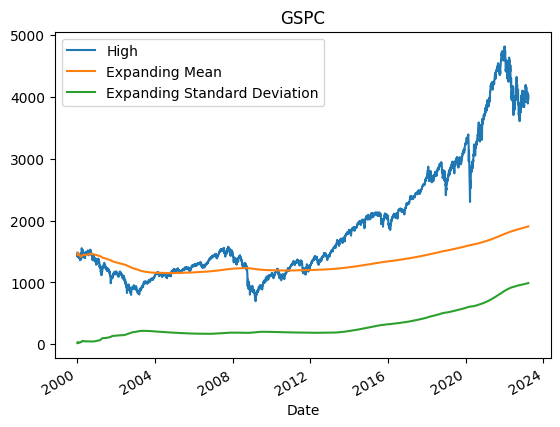

In [13]:
# Expanding window functions
GSPC_mean = GSPC.High.expanding().mean()
GSPC_std = GSPC.High.expanding().std()
GSPC.High.plot()
GSPC_mean.plot()
GSPC_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('GSPC')
plt.show()

En los precios del índice S&P500, vemos que para el 2009 el valor High estuvo por debajo de la media durante mucho tiempo, por lo que podemos decir que hubo algunas pérdidas debido a  momentos de mayor incertidumbre.

#### Rendimiento diario del índice

In [18]:
# Calcular el rendimiento diario del índice
GSPC['daily_return'] = GSPC['Adj Close'].pct_change().fillna(0)

In [19]:
# Reiniciar el índice y establecerlo como una columna
GSPC = GSPC.reset_index()
fig = px.line(GSPC, x='Date', y='Close', title='Indice S&P 500', labels={'Date': 'Fecha', 'Close': 'Precio Close'}, height=400, width=900)
fig.show()

In [21]:
# Crear el gráfico utilizando Plotly
fig = px.line(GSPC, x='Date', y='daily_return', title='Índice S&P 500',
              labels={'Date': 'Fecha', 'daily_return': 'Rendimiento diario'}, height=400, width=900)

# Agregar título y etiquetas a los ejes
fig.update_layout(title_text='Indice SP500', xaxis_title='Fecha', yaxis_title='Rendimiento Diario')
fig.show()

### **S&P500 Company**

In [22]:
# Descarga la lista de empresas del S&P 500 desde Wikipedia
sp500_list = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_list

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                       Pharmaceuticals  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [23]:
# Renombrar los 2 valores de la columna 'Symbol' en el dataframe, para evitar conflicto al extraer la data de los mismos.
sp500_list['Symbol'].replace({'BRK.B': 'BRK-B', 'BF.B': 'BF-B'}, inplace=True)

In [24]:
# Obtén los símbolos de las empresas del S&P 500
sp500_symbols = sp500_list['Symbol']
len(sp500_symbols)

503

#### Webscraping S&P500 company

In [25]:
# descargar los datos de todas las empresas en un solo DataFrame
sp500_data = pd.DataFrame()
for symbol in sp500_symbols:
    data = yf.download(symbol, start="2000-01-01", end="2023-03-26")
    data['Symbol'] = symbol # agregar una columna con el símbolo de la empresa
    data = data.rename(columns={'Date': 'date'}) # renombrar la columna de fecha
    sp500_data = sp500_data.append(data)

[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed

C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed

C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_6160\2513910862.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



###

#### Merge

In [28]:
# Reiniciar el índice y establecerlo como una columna
sp500_data = sp500_data.reset_index()

In [29]:
# Unimos los dataframes utilizando merge 
df_merge = pd.merge(sp500_data,sp500_list[["Symbol","Security", "GICS Sector","GICS Sub-Industry"]], on='Symbol')

# Renombrar nombre de columnas
df_merge = df_merge.rename(columns={'GICS Sector': 'Sector', 'GICS Sub-Industry': 'SubIndustry'})

In [31]:
# Agregar una nueva columna con el día de la semana correspondiente
df_merge['Day'] = df_merge['Date'].dt.day_name()
df_merge.head(2)

Date      Open      High       Low    Close  Adj Close   Volume  \
0 2000-01-03  48.03125  48.25000  47.03125  47.1875  25.143322  2173400   
1 2000-01-04  46.43750  47.40625  45.31250  45.3125  24.144255  2713800   

  Symbol Security       Sector               SubIndustry      Day  
0    MMM       3M  Industrials  Industrial Conglomerates   Monday  
1    MMM       3M  Industrials  Industrial Conglomerates  Tuesday

In [39]:
# Calcular los retornos diarios
df_merge['Daily_Return'] = df_merge.groupby('Symbol')['Adj Close'].pct_change().fillna(0)
df_merge.head()

Date      Open      High       Low    Close  Adj Close   Volume  \
0 2000-01-03  48.03125  48.25000  47.03125  47.1875  25.143322  2173400   
1 2000-01-04  46.43750  47.40625  45.31250  45.3125  24.144255  2713800   
2 2000-01-05  45.56250  48.12500  45.56250  46.6250  24.843594  3699400   
3 2000-01-06  47.15625  51.25000  47.15625  50.3750  26.841749  5975800   
4 2000-01-07  50.56250  51.90625  49.96875  51.3750  27.374582  4101200   

  Symbol Security       Sector               SubIndustry        Day  \
0    MMM       3M  Industrials  Industrial Conglomerates     Monday   
1    MMM       3M  Industrials  Industrial Conglomerates    Tuesday   
2    MMM       3M  Industrials  Industrial Conglomerates  Wednesday   
3    MMM       3M  Industrials  Industrial Conglomerates   Thursday   
4    MMM       3M  Industrials  Industrial Conglomerates     Friday   

   Daily_Return  
0      0.000000  
1     -0.039735  
2      0.028965  
3      0.080429  
4      0.019851

In [37]:
# Calcular los rendimientos acumulativos por sector
sector_returns = df_merge.groupby(['Sector', 'Date'])['Daily_Return'].mean().groupby('Sector').cumsum()

# Encontrar el sector con el mejor rendimiento acumulativo en cada fecha
best_performing_sectors = sector_returns.groupby('Date').idxmax()

# Crear un gráfico interactivo con Plotly
fig = px.line(sector_returns.reset_index(), x='Date', y='Daily_Return', color='Sector', title='Rendimiento acumulativo por sector')

# Personalizar el diseño
fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Rendimiento acumulativo',
    legend_title='Sector',
    width=1000,
    height=500
)

fig.show()

In [43]:
# Agrupar por sector y contar la cantidad de empresas en cada sector
sp500_sector_counts = sp500_list.groupby("GICS Sector")["Symbol"].nunique()

# Ordenar los valores de manera descendente
sp500_sector_counts = sp500_sector_counts.sort_values(ascending=True)

# Crear un DataFrame con los datos ordenados
sp500_sector = pd.DataFrame({'Sector': sp500_sector_counts.index, 'Cantidad de Empresas': sp500_sector_counts.values})

# Crear la gráfica utilizando Plotly Express
fig = px.bar(sp500_sector, x='Cantidad de Empresas', y='Sector', orientation='h', title='Cantidad de Empresas en cada Sector del S&P 500', width=1000, height=400)
fig.show()

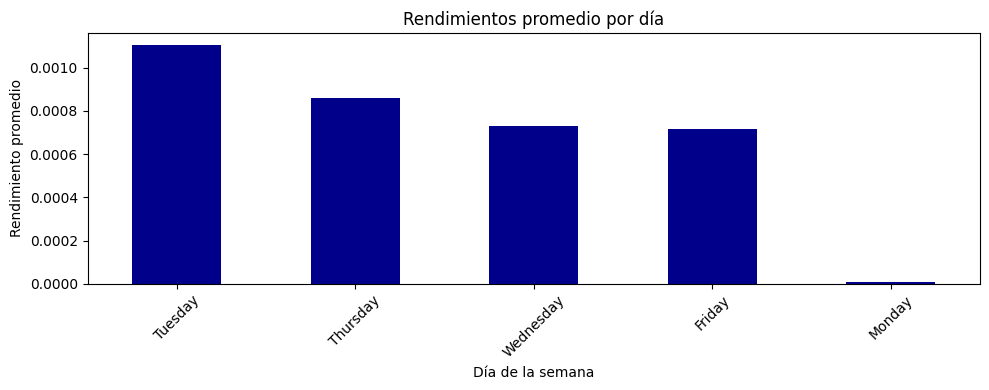

In [53]:
# Calcular los rendimientos promedio por día de la semana
average_returns_by_weekday = df_merge.groupby('Day')['Daily_Return'].mean()

# Ordenar los valores en orden descendente
average_returns_by_weekday = average_returns_by_weekday.sort_values(ascending=False)

# Crear un gráfico de barras para visualizar los rendimientos promedio
plt.figure(figsize=(10, 4))
average_returns_by_weekday.plot(kind='bar', color='darkblue')
plt.title('Rendimientos promedio por día')
plt.xlabel('Día de la semana')
plt.ylabel('Rendimiento promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
df_merge

Date        Open        High         Low       Close  \
0       2000-01-03   48.031250   48.250000   47.031250   47.187500   
1       2000-01-04   46.437500   47.406250   45.312500   45.312500   
2       2000-01-05   45.562500   48.125000   45.562500   46.625000   
3       2000-01-06   47.156250   51.250000   47.156250   50.375000   
4       2000-01-07   50.562500   51.906250   49.968750   51.375000   
...            ...         ...         ...         ...         ...   
2626262 2023-03-20  164.000000  165.949997  163.699997  165.820007   
2626263 2023-03-21  166.649994  166.990005  165.139999  166.240005   
2626264 2023-03-22  165.389999  165.940002  161.320007  161.380005   
2626265 2023-03-23  162.000000  165.449997  159.389999  161.240005   
2626266 2023-03-24  161.000000  164.940002  159.970001  164.179993   

          Adj Close   Volume Symbol Security       Sector  \
0         25.143322  2173400    MMM       3M  Industrials   
1         24.144255  2713800    MMM       3M  Industrials   
2         24.843594  3699400    MMM       3M  Industrials   
3         26.841749  5975800    MMM       3M  Industrials   
4         27.374582  4101200    MMM       3M  Industrials   
...             ...      ...    ...      ...          ...   
2626262  165.101547  2145800    ZTS   Zoetis  Health Care   
2626263  165.519730  2453500    ZTS   Zoetis  Health Care   
2626264  160.680771  1475600    ZTS   Zoetis  Health Care   
2626265  160.541382  3560800    ZTS   Zoetis  Health Care   
2626266  163.468628  1864900    ZTS   Zoetis  Health Care   

                      SubIndustry        Day  Daily_Return  
0        Industrial Conglomerates     Monday      0.000000  
1        Industrial Conglomerates    Tuesday     -0.039735  
2        Industrial Conglomerates  Wednesday      0.028965  
3        Industrial Conglomerates   Thursday      0.080429  
4        Industrial Conglomerates     Friday      0.019851  
...                           ...        ...           ...  
2626262           Pharmaceuticals     Monday      0.008208  
2626263           Pharmaceuticals    Tuesday      0.002533  
2626264           Pharmaceuticals  Wednesday     -0.029235  
2626265           Pharmaceuticals   Thursday     -0.000867  
2626266           Pharmaceuticals     Friday      0.018234  

[2626267 rows x 13 columns]

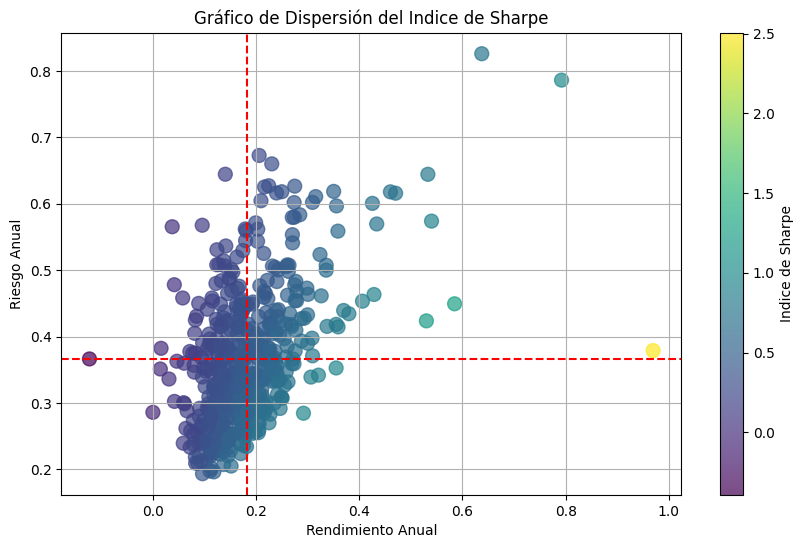

In [66]:
# Calcular los rendimientos esperados y riesgos anuales
annual_returns = df_merge.groupby('Symbol')['Daily_Return'].mean() * 252
annual_risk = df_merge.groupby('Symbol')['Daily_Return'].std() * np.sqrt(252)

# Calcular el índice de Sharpe para cada empresa (asumiendo una tasa libre de riesgo del 2%)
risk_free_rate = 0.02
sharpe_ratios = (annual_returns - risk_free_rate) / annual_risk

# Crear un DataFrame con los datos del índice de Sharpe
sharpe_data = pd.DataFrame({'Symbol': sharpe_ratios.index, 'Sharpe Ratio': sharpe_ratios.values})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(annual_returns,annual_risk, c=sharpe_ratios, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='Indice de Sharpe')
plt.xlabel('Rendimiento Anual')
plt.ylabel('Riesgo Anual')
plt.title('Gráfico de Dispersión del Indice de Sharpe')
plt.grid(True)

# Agregar líneas de cuadrantes utilizando las medias del rendimiento y la desviación estándar
plt.axvline(annual_returns.mean(), color='r', linestyle='--')
plt.axhline(annual_risk.mean(), color='r', linestyle='--')

plt.show()


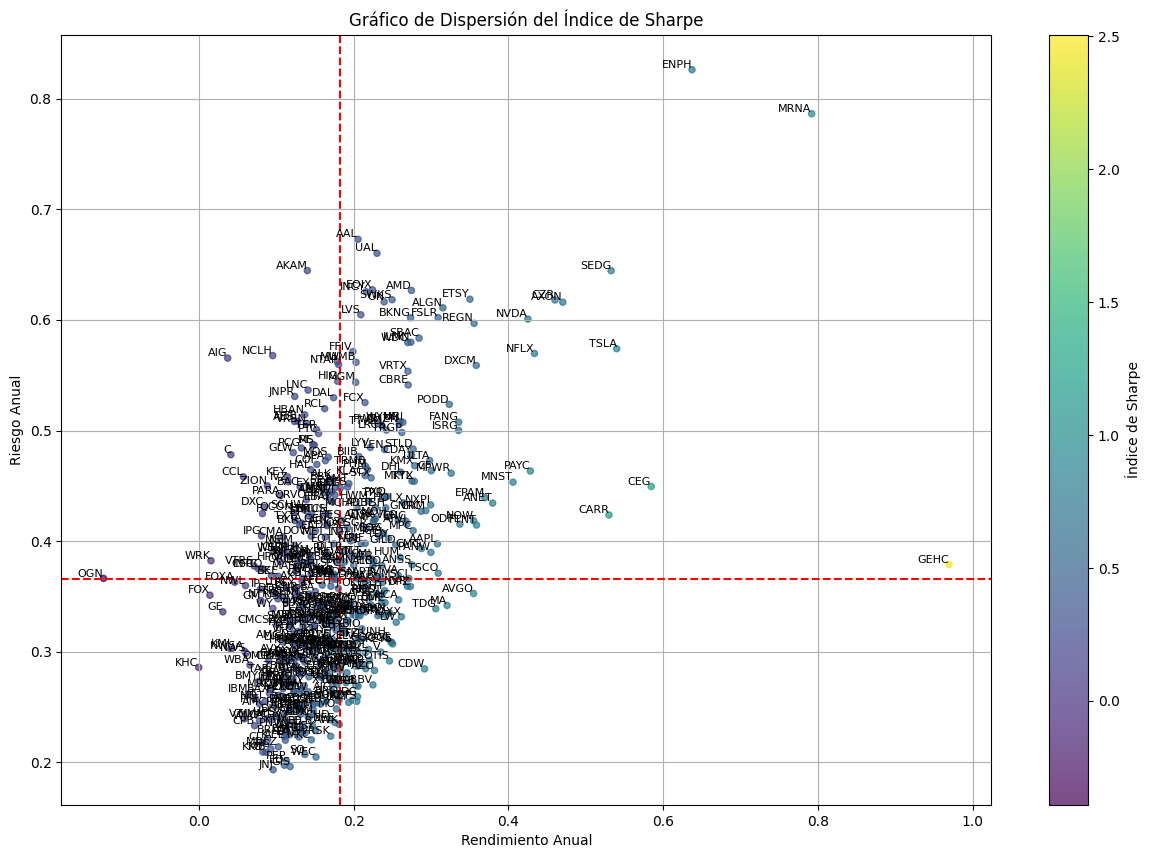

In [86]:
# Calcular los rendimientos esperados y riesgos anuales
annual_returns = df_merge.groupby('Symbol')['Daily_Return'].mean() * 252
annual_risk = df_merge.groupby('Symbol')['Daily_Return'].std() * np.sqrt(252)

# Calcular el índice de Sharpe para cada empresa (asumiendo una tasa libre de riesgo del 2%)
risk_free_rate = 0.02
sharpe_ratios = (annual_returns - risk_free_rate) / annual_risk

# Crear un DataFrame con los datos del índice de Sharpe
sharpe_data = pd.DataFrame({'Symbol': sharpe_ratios.index, 'Sharpe Ratio': sharpe_ratios.values})

# Crear un gráfico de dispersión
plt.figure(figsize=(15, 10))
scatter = plt.scatter(annual_returns, annual_risk, c=sharpe_ratios, cmap='viridis', s=20, alpha=0.7)
plt.colorbar(scatter, label='Índice de Sharpe')
plt.xlabel('Rendimiento Anual')
plt.ylabel('Riesgo Anual')
plt.title('Gráfico de Dispersión del Índice de Sharpe')
plt.grid(True)

# Agregar líneas de cuadrantes utilizando las medias del rendimiento y la desviación estándar
plt.axhline(annual_risk.mean(), color='r', linestyle='--')
plt.axvline(annual_returns.mean(), color='r', linestyle='--')

# Agregar el símbolo de la empresa a cada punto
for symbol, x, y in zip(annual_risk.index, annual_returns, annual_risk):
    plt.text(x, y, symbol, fontsize=8, ha='right', va='bottom', color='black')

plt.show()